In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv("/mnt/c/Users/mercg/Downloads/insurance_data.csv")
df.shape

(27, 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.2)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [10]:
model.predict_proba(X_test)

array([[0.77104106, 0.22895894],
       [0.88175254, 0.11824746],
       [0.30366321, 0.69633679],
       [0.1004119 , 0.8995881 ],
       [0.13564167, 0.86435833],
       [0.79047   , 0.20953   ]])

In [11]:
df1 = pd.read_csv("/mnt/c/Users/mercg/Downloads/HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df1['salary'].unique()

array([0., 1., 2.])

In [13]:
sal = ['low', 'medium', 'high']
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories= [sal])

In [14]:
df1['salary'] = enc.fit_transform(df1[['salary']])
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0.0
14995,0.37,0.48,2,160,3,0,1,0,support,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,0.0


In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
d = ros.fit_resample(X_train, y_train)


In [16]:
df2 = df1[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0.0
1,0.80,262,0,1.0
2,0.11,272,0,1.0
3,0.72,223,0,0.0
4,0.37,159,0,0.0
...,...,...,...,...
14994,0.40,151,0,0.0
14995,0.37,160,0,0.0
14996,0.37,143,0,0.0
14997,0.11,280,0,0.0


In [17]:
df22 = pd.get_dummies(df2['salary'])
merged = pd.concat([df2, df22], axis = 1)
merged = merged.drop(columns='salary')
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,0.0,1.0,2.0
0,0.38,157,0,True,False,False
1,0.80,262,0,False,True,False
2,0.11,272,0,False,True,False
3,0.72,223,0,True,False,False
4,0.37,159,0,True,False,False
...,...,...,...,...,...,...
14994,0.40,151,0,True,False,False
14995,0.37,160,0,True,False,False
14996,0.37,143,0,True,False,False
14997,0.11,280,0,True,False,False


In [18]:
X_train, X_test, y_train, y_test = train_test_split(merged, df1['left'], test_size = 0.3)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [21]:
model.score(X_test, y_test)

0.7831111111111111

In [22]:
from sklearn.datasets import load_digits

In [31]:
digit = load_digits()

In [32]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

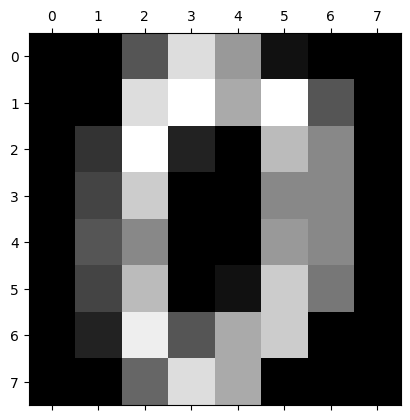

In [49]:
plt.gray()
plt.matshow(digit.images[0])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size = 0.3)

In [35]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/mercg/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9611111111111111

In [56]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

<Axes: >

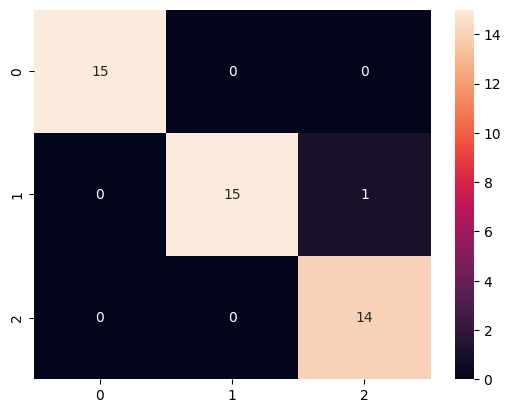

In [57]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [41]:
from sklearn.datasets import load_iris

In [44]:
img = load_iris()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(img.data, img.target, test_size = 0.3)

In [63]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777